## Machine learning from disaster by Olabode Alamu

The sinking of the Titanic is one of the most tragic maritime accidents of all time, it sank on the 15th of April 1912 in the North Atlantic Ocean leaving 1500 people out of it 2224 passengers dead.

The Titanic was on its maiden voyage from Southampton to Newyork with stops at Cherbourg and Queenstown to pick up more passengers.

This project is concerned with exploring the data available for the passengers and applying machine learning algorithms to predict if a particular passenger would survive or not.

The data was gotten from Kaggle [here](https://www.kaggle.com/c/titanic/data) .




In [1713]:
# Import the libraries
import numpy as np
import pandas as pd


In [1714]:
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [1715]:
# import Machine learning 
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [1716]:
# Import the data into a dataframe
titanic = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [1717]:
# Explore the dataset
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1718]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1719]:
# Basic statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1720]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1721]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1722]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1723]:
# Check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1724]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As can be seen above, the Age column has lots of missing values, a suitable inputation technique would need to be implemented to fill these missing values.

## Function for calculating percentages in different categories in this dataset

Several times in this project, I had to determine the percentage of each category in this dataset. In order to do this in an expedite fashion, the function below was written and would be used several times in this notebook.

In [1725]:

def count(dataframe, column_name):
    """
    Written by Olabode Alamu 15th Jan 2017
    Function calculates the percentage of the different categorical variables.
    The function takes in two parameters- dataframe and column_name and returns 
    the percentage of each category in any particular column.
    
    dataframe = Name of the dataframe under consideration
    column_name = string of column name of the column with categorical variables
    """
    try:
        total = len(dataframe[column_name]) # Counts the number of rows
        for i in dataframe[column_name].unique():
            # Counts the number of rows in each class
            Count = len(dataframe[dataframe[column_name]==i])
            print('Percentage in column '+column_name +' with value '+ str(i)+ ' is' , (Count/total)*100, '%')
    
    except:
        print('Column name not found in dataset or Dataframe doesnt exist.')
            

## Data Visualization

Basic data visualization would be carried out in order to investigate the effect of the different parameters on the survival of the passengers.

### Effect of gender on survival chances

From the portrayal of the events of the 15th of April in movies and documentaries, it is generally believed that women and children were allowed to get on the lifeboats first before men. Lets explore the data to see what it says.

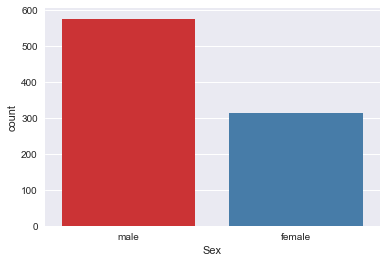

In [1726]:
sns.countplot(x = 'Sex', data = titanic, palette='Set1')

What percentage of the passengers are women? 

In [1727]:
count(dataframe=titanic,column_name='Sex')

Percentage in column Sex with value male is 64.75869809203144 %
Percentage in column Sex with value female is 35.24130190796858 %


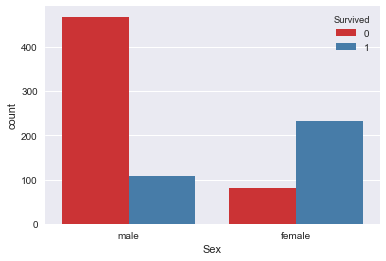

In [1728]:
# Visualize the proportion of males to females survived
sns.countplot(x='Sex' , hue= 'Survived', data = titanic,  palette='Set1')

In [1729]:
# What is the exact number of men that died?
M = titanic[titanic['Sex']=='male']
len(M[M['Survived']== 0])

468

In [1730]:
len(titanic[titanic['Sex']=='male'][titanic[titanic['Sex']=='male']['Survived']== 0])

468

In [1731]:
# What is the exact number of women that died?
F = titanic[titanic['Sex']=='female']
len(F[F['Survived']== 0])

81

The red column shows those who died while the blue column shows those who survived. It can be seen that over 450 men died as compared to 100 men who survived, while on the other hand, less than a 100 women died and above 200 survived.

Could the larger number of males onboard be a reason for their larger number of casualities? The ratio of men to women is nearly 2:1, however, when we compare the number of casualities of men (468) to women (81), we see a ratio of nearly 6:1.

This is in agreement with the movies... Sex is therefore a strong predictor of survival.

### Effect of passenger class on survival

The titanic had 3 passenger classes- First class, Second class and Third class. More information about this can be found [here](https://en.wikipedia.org/wiki/RMS_Titanic#Passenger_facilities).

The class is represented by the column Pclass in the dataframe. 

Lets investiage the role Passenger class had on the survival chances of the passengers.

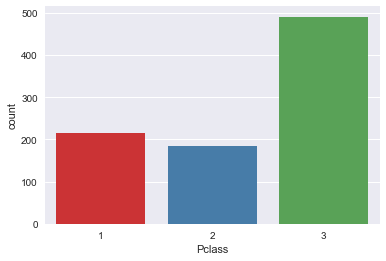

In [1732]:
# Visualize the distribution amongst the different classes
sns.countplot(x = 'Pclass', data= titanic , palette='Set1')

The vast majority of passengers were in the third class on the ship, next to the first class passengers and last to those in second class.

In [1733]:
# Shows the percentage of passengers in each class
count(titanic,'Pclass')

Percentage in column Pclass with value 3 is 55.106621773288445 %
Percentage in column Pclass with value 1 is 24.242424242424242 %
Percentage in column Pclass with value 2 is 20.65095398428732 %


What effect did the class a passenger belong to have on their survival?

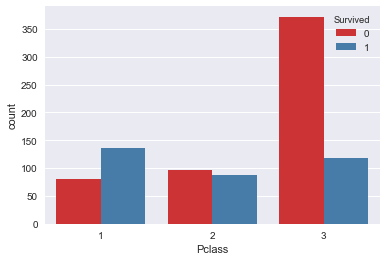

In [1734]:
sns.countplot(x = 'Pclass', data = titanic, hue= 'Survived', palette='Set1')

The red bars represents the count of passengers that died in each class. The 1st class passengers had the lowest death toll, next to passengers in the 2nd class, while those in the 3rd class suffered the most casualities. 


This shows that being among the first class passengers gave you a better chance of surviving the incident.

Would you stand a better chance of surviving if you were female and in first class?

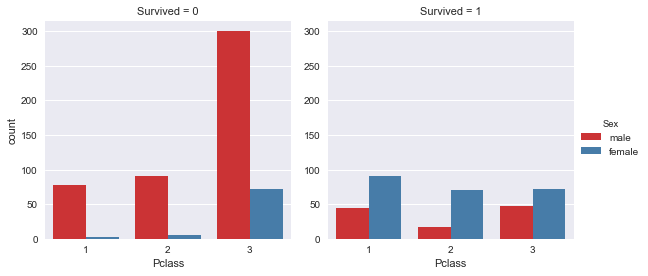

In [1735]:
sns.factorplot(x = 'Pclass', col = 'Survived',hue = 'Sex'
               , data = titanic, kind = 'count',palette='Set1')

In [1736]:
# How many women in First class died?
F = titanic[titanic['Sex']=='female'] # Dataframe showing females onboard
Female_died = F[F['Survived']== 0] # Dataframe showing females that died
# Dataframe showing females in first class that died
Female_died[Female_died['Pclass']==1] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


Looks like there is an interaction between sex and the passenger class. From the above diagram, it can be seen that being female (blue bars) and also being in the first class gave you a much better chance of surviving.

Infact, there were only 3 women that were in first class that died out of the 81 women that died in this dataset.

Being a man in third class put you at a very high likehood of not surviving the incident, but your odds of survival increased as you went up a class, with men in first class having the best chances of survival amongst the men.



### Effect of Number of siblings on survival

In a moment of chaos like that on the titanic, could having siblings onboard spell doom for you? or would it help improve your chances of survival?

The number of siblings / spouse is represented by the column SibSp in the dataset.

What effect does the number of siblings present have on the probability of survival of the passenger?

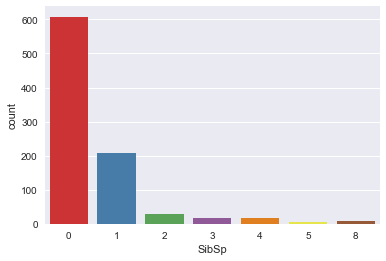

In [1737]:
# Visualize the distribution
sns.countplot(x = 'SibSp', data = titanic,palette='Set1')


A good number of the passengers had no siblings onboard with them.

In [1738]:
count(titanic,'SibSp')

Percentage in column SibSp with value 1 is 23.456790123456788 %
Percentage in column SibSp with value 0 is 68.23793490460157 %
Percentage in column SibSp with value 3 is 1.7957351290684627 %
Percentage in column SibSp with value 4 is 2.0202020202020203 %
Percentage in column SibSp with value 2 is 3.1425364758698096 %
Percentage in column SibSp with value 5 is 0.5611672278338945 %
Percentage in column SibSp with value 8 is 0.7856341189674524 %


The vast majority of passengers (91.7 %) were either by themselves or had a spouse/sibling onboard.

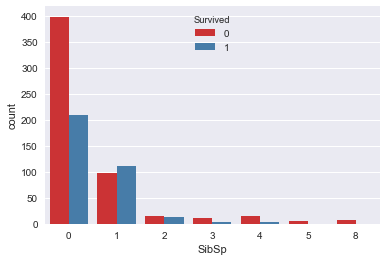

In [1739]:
sns.countplot(x = 'SibSp', data = titanic, hue= 'Survived', palette='Set1')

Being single was actually risky! A very large number of single men and women died, while those with a spouse or sibling had a better chance of surviving.

Having 3 or more siblings was actually bad news, maybe because it would have been difficult to find where everyone was amidst the chaos. 

Infact, having siblings greater than 4 in number meant you weren't going to survive.

In [1740]:
# What group had 8 siblings?
titanic[titanic['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


You can read about the Sage family [here](https://www.encyclopedia-titanica.org/titanic-victim/thomas-henry-sage.html)

How many passengers have parents onboard?

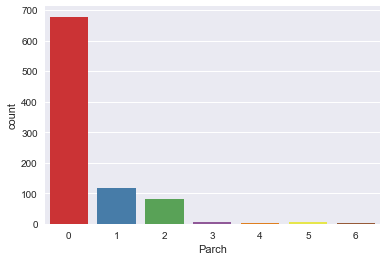

In [1741]:
sns.countplot(x = 'Parch', data = titanic, palette='Set1')

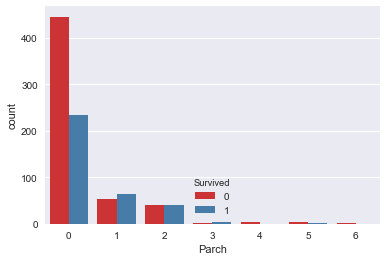

In [1742]:
sns.countplot(x = 'Parch', data = titanic, hue= 'Survived', palette='Set1')

### What effect does family size have on the probability of survival of a passenger.

In [1743]:
# Create a column that shows the size of the family
titanic['Family Size'] = titanic['SibSp']+titanic['Parch']+ 1
# Create a column that shows the size of the family
test['Family Size'] = test['SibSp']+test['Parch']+ 1

In [1744]:
titanic.head(3)

C:\Users\bodea\Anaconda3\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


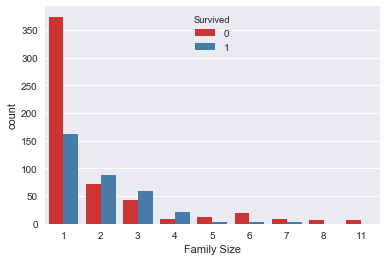

In [1745]:
sns.countplot(x = 'Family Size', data = titanic, hue= 'Survived', palette='Set1')

This shows a very interesting relationship, being alone on the titanic leaves you at a greater chance of not surviving, whereas, as the family size increases to a size of 4, the chance of survival increases. Beyond a size of 4, there was a greater chance of not surviving the incident.

### Port of Embarkment

The image shows the route of the Titanic. https://commons.wikimedia.org/wiki/File:Titanic_voyage_map.png#/media/File:Titanic_voyage_map.png

The Titanic began its journey from Southampton to Cherbourg and then Queenstown.

In [1746]:
titanic['Embarked'].fillna(value = 'S', inplace = True)

In [1747]:
# What was the percentage of passengers that embarked at the different ports?
count(dataframe=titanic, column_name='Embarked')

Percentage in column Embarked with value S is 72.50280583613917 %
Percentage in column Embarked with value C is 18.855218855218855 %
Percentage in column Embarked with value Q is 8.641975308641975 %


The majority of passengers got on the Ship from Southampton while the least got on from Queenstown. 
Lets see what information this gives us.

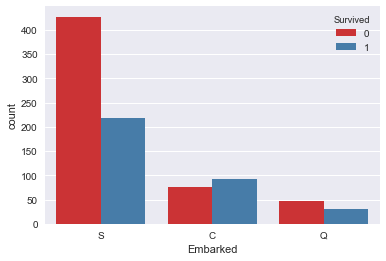

In [1748]:
sns.countplot(x = 'Embarked', data = titanic, hue= 'Survived', palette='Set1')

The relative number of casualities follows the trend of relative number of people that embark on the journey at each port which makes sense.

However, at Cherbourg, a larger number of passengers survived amongst those that embarked at that city.

What could be responsible? Could class have a hand in this?

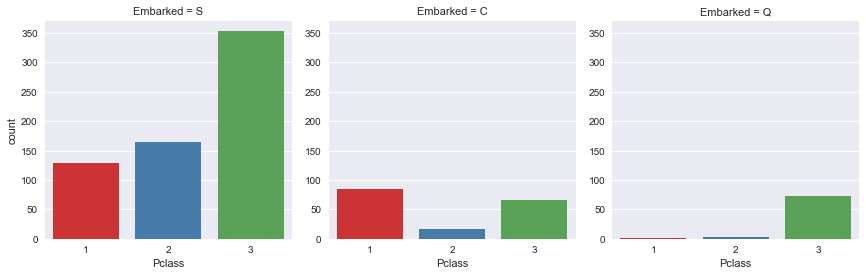

In [1749]:
sns.factorplot(col = 'Embarked', x = 'Pclass', data = titanic
               , kind = 'count', palette='Set1')

A greater proportion of passengers that got on the titanic from Southampton and Queenstown were 3rd class passngers. As for Cherbourg, the 1st class passengers were the largest proportion, this might explain the improved chance of survival experienced by passengers that embarked in this port.

### Effect of fare paid

Could your fare price have had an effect on your chance of survival? In order to investigate this, we need to create a new column called Fare per person.

In [1750]:
titanic['Fare per person']= titanic['Fare']/ titanic['Family Size']

In [1751]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family Size      0
dtype: int64

In [1752]:
# fill the missing Fare value in the test dataset with the median fare value
test['Fare'].fillna(value = test['Fare'].median(), inplace = True)

In [1753]:
test['Fare per person']= test['Fare']/ test['Family Size']

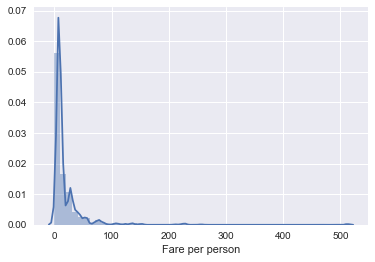

In [1754]:
sns.distplot(a= titanic['Fare per person'], bins=50, )

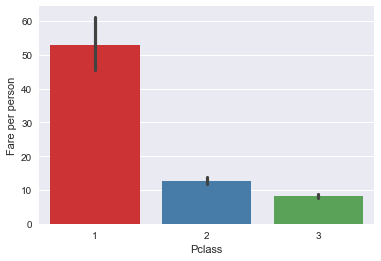

In [1755]:
# What was the average fare paid per class?
sns.barplot(data = titanic, x = 'Pclass', y = 'Fare per person', palette='Set1')

Third class passengers paid on average a fare less than #10 , while first class passengers paid a fare above #50.

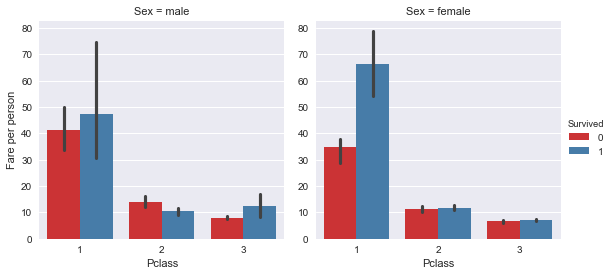

In [1756]:

sns.factorplot(data = titanic, x = 'Pclass', col = 'Sex'
            ,y='Fare per person',hue='Survived' , palette='Set1', kind = 'bar')

On average, the survivors from the first class paid more in fare.

### Effect of Age

The age column in the training and test dataset has missing values which need to be filled.

In [1757]:
titanic.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Family Size          0
Fare per person      0
dtype: int64

In [1758]:
test.isnull().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              327
Embarked             0
Family Size          0
Fare per person      0
dtype: int64

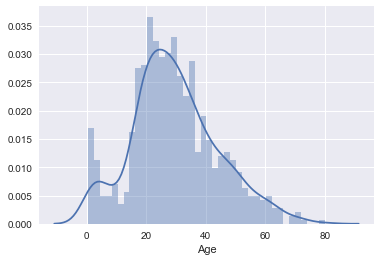

In [1759]:
# Check the distribution of the age before filling the holes
sns.distplot(a = titanic['Age'].dropna(), bins=40)

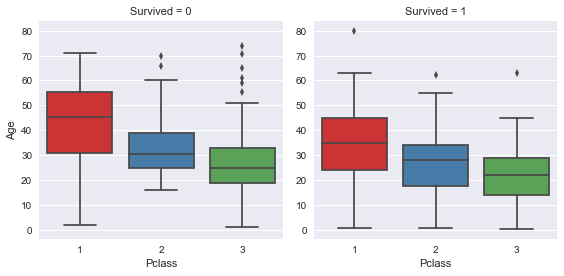

In [1760]:
sns.factorplot(y= 'Age', data = titanic, x = 'Pclass', kind = 'box', col = 'Survived', palette='Set1')

The age column has lots of missing values, we need to input those values.

In [1761]:
def age_input(dataframe):
    """
    This function fills the missing age values with random numbers generated between two values.
    The first value is the mean - standard deviation while the second value is the mean plus the standard deviation.
    
    Accepts the name of the dataframe as input and returns a dataframe with no missing values in the Age column
    """
    Number_missing_age = dataframe['Age'].isnull().sum() # Counts the number of nan values
    Mean_age = dataframe['Age'].mean() # calculates the mean values
    Std_age = dataframe['Age'].std() # calculates the standard deviation values
    
    # Generates random numbers the size of the missing values
    random_age = np.random.randint(low =(Mean_age-Std_age) , high= (Mean_age+Std_age), size= Number_missing_age)
    dataframe.loc[:,'Age'][np.isnan(dataframe['Age'])]= random_age
    #df.loc[:,'B'][np.isnan(df['B'])]= filll
    

In [1762]:
age_input(titanic)

C:\Users\bodea\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1763]:
titanic.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Family Size          0
Fare per person      0
dtype: int64

In [1764]:
age_input(test)

C:\Users\bodea\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1765]:
test.isnull().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              327
Embarked             0
Family Size          0
Fare per person      0
dtype: int64

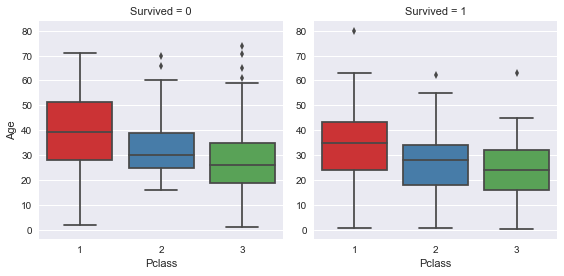

In [1766]:
sns.factorplot(y= 'Age', data = titanic, x = 'Pclass', kind = 'box', col = 'Survived', palette='Set1')

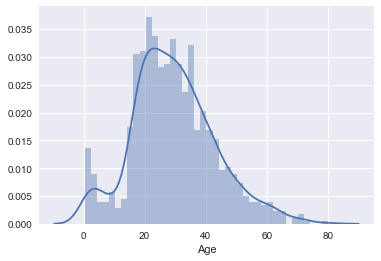

In [1767]:
# Check the distribution of the age after filling the holes
sns.distplot(a = titanic['Age'].dropna(), bins=40, )

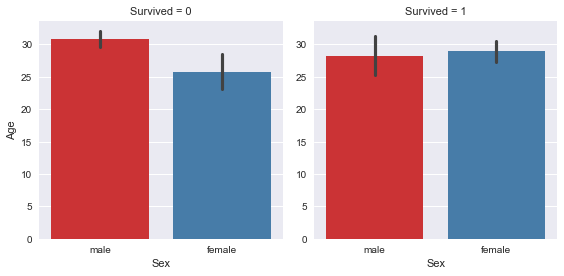

In [1768]:
sns.factorplot(y= 'Age', data = titanic, x = 'Sex', kind = 'bar', col = 'Survived', palette='Set1')

In [1769]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Fare per person
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,7.829200
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,3.500000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,9.687500
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,8.662500
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,4.095833


### Preparation for Machine learning

In order to prepare the dataset for machine learning algorithms, we would need to perform the following tasks:
1) Create dummy variables for the Sex column and the Embarked columns.
2) Drop non numeric columns.

In [1770]:
def embarked_dummy(dataframe, label_drop):
    
    """
    Function creates dummy variable for the Embarked column, drops one of the column in the dummy column 
    and joins to the previous dataframe. This function also drops the columns with the names in the list
    column_drop in the passed dataframe.
    
    dataframe = Name of the dataframe
    label_drop = string: String of categorical value in Sex column which you would like to drop
    column_drop = list: list of column labels which you want to be dropped
    
    """
    import pandas as pd
    embarked_dummy = pd.get_dummies(data = dataframe['Embarked'])
    # Drop column in dummy column
    embarked_dummy.drop(labels= label_drop, inplace=True, axis=1)
    
    # Merge to the dataset 
    dataframe= dataframe.join(embarked_dummy)

    return dataframe
    

In [1771]:
titanic = embarked_dummy(dataframe=titanic, label_drop='S')

In [1772]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Fare per person,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,0,0


In [1773]:
test = embarked_dummy(dataframe=test, label_drop='S')

In [1774]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Fare per person,C,Q
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,7.829200,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,3.500000,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,9.687500,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,8.662500,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,4.095833,0,0


In [1775]:
def gender_dummy(dataframe, label_drop, column_drop):
    
    """
    Function creates dummy variable for the Sex column, drops one of the column in the dummy column 
    and joins to the previous dataframe. This function also drops the columns with the names in the list
    column_drop in the passed dataframe.
    
    dataframe = Name of the dataframe
    label_drop = string: String of categorical value in Sex column which you would like to drop
    column_drop = list: list of column labels which you want to be dropped
    
    """
    import pandas as pd
    gender_dummy = pd.get_dummies(data = dataframe['Sex'])
    # Drop column in dummy column
    gender_dummy.drop(labels= label_drop, inplace=True, axis=1)
    
    # Merge to the dataset 
    dataframe= dataframe.join(gender_dummy)
    # Drop Sex column
    dataframe.drop(labels = column_drop, axis = 1, inplace = True )
    
    return dataframe
    
    

In [1776]:
dropped = ['Cabin', 'Sex', 'SibSp', 'Parch', 'Ticket','Fare', 'Embarked','Name']

In [1777]:
# apply to train dataset
titanic = gender_dummy(dataframe=titanic, label_drop='male', column_drop=dropped)

In [1778]:
titanic.head(3)

,PassengerId,Survived,Pclass,Age,Family Size,Fare per person,C,Q,female
0,1,0,3,22.0,2,3.62500,0,0,0
1,2,1,1,38.0,2,35.64165,1,0,1
2,3,1,3,26.0,1,7.92500,0,0,1


In [1779]:
# apply to train dataset
test = gender_dummy(dataframe=test, label_drop='male', column_drop=dropped)

In [1780]:
test.head(3)

,PassengerId,Pclass,Age,Family Size,Fare per person,C,Q,female
0,892,3,34.5,1,7.8292,0,1,0
1,893,3,47.0,2,3.5000,0,0,1
2,894,2,62.0,1,9.6875,0,1,0


Split into training and test

In [1781]:
# define training and testing sets

X_train = titanic.drop(["Survived",'PassengerId'],axis=1)
Y_train = titanic["Survived"]
X_test  = test.drop("PassengerId",axis=1).copy()

## Machine learning algorithm

Several machine learning algorithms would be tested and scored, the algorithm with the highest score would then be used for prediction on the test set.

In [1782]:
# Names of classifiers
names = ['LogisticRegression',"Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest", "Naive Bayes"]

In [1783]:
classifiers = [LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB()]

In [1784]:
def classifer_iterate(names, classifiers, X_train, Y_train):
    import matplotlib.pyplot as plt
    plt.Figure(figsize=(20,6))
    D = {}
    for name, clf in zip(names, classifiers):
        clf.fit(X = X_train,y = Y_train)
        score = clf.score(X_train, Y_train)
        D[name]= score
        print('Score of ' + name + ' is ', score)
        
    print('-------------------------------------------------------------------------')
    plt.bar(range(len(D)), list(D.values()))
    

Score of LogisticRegression is  0.795735129068
Score of Nearest Neighbors is  0.850729517396
Score of Linear SVM is  0.786756453423
Score of RBF SVM is  0.965207631874
Score of Random Forest is  0.842873176207
Score of Naive Bayes is  0.795735129068
-------------------------------------------------------------------------


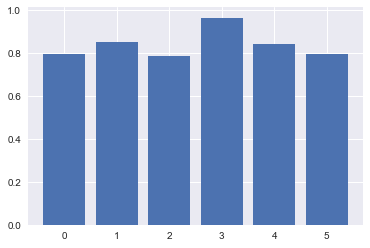

In [1785]:
classifer_iterate(names=names, classifiers=classifiers,X_train=X_train, Y_train=Y_train)

Prediction off the test set

In [1786]:
#  Support Vector Machine
SVM_RBF = SVC(gamma=2, C=1)
SVM_RBF.fit(X_train, Y_train)
Y_pred = SVM_RBF.predict(X_test)

In [1787]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

In [1788]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0
